# Introduction

The ojective of this project is to use deep learning neural network to classify different types of poodle dogs. This dataset is a subset of the Stanford dog breeds image dataset.
This dataset includes 465 images and 3 classes. Images from the same class are stored in the same directory named as the class label.
- toy poodles
- standard poodles
- miniature poodles

#### This notebook (01) loads the images and labels, and save them as tensorflow datasets that will be used in notebook 02 for modeling. Some functions called in this notebook and other notebooks are defined in 'mymodules.py' file.

In [ ]:
#Import libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
print("TF version:", tf.__version__)

#Check whether GPU is available
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

TF version: 2.9.2
GPU not available


Link to Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the user defined modules

In [ ]:
import sys
sys.path.append('./drive/MyDrive/dog_breeds_classification/notebooks')
import mymodules

# 1 Load and process data

In [ ]:
DATA_PATH = "./drive/MyDrive/dog_breeds_classification/Images_Poodles"
IMAGE_SIZE = 224
BATCH_SIZE = 16

In [ ]:
unique_labels = []
for folders in os.listdir(DATA_PATH):
    unique_labels.append(folders)
print("There are {} classes: {}".format(len(unique_labels), unique_labels))

There are 3 classes: ['toy_poodle', 'standard_poodle', 'miniature_poodle']


## 1.1 Load images

Load in the images from each folder, and plot the count of images in each class

In [ ]:
image_names_arr, labels_arr = mymodules.retrieve_images_and_labels(DATA_PATH, unique_labels)
print("The total number of images is", len(image_names_arr))

The total number of images is 465


In [ ]:
def plot_image_counts(unique_labels, labels):
  """
  plot the distribution of different classes in a bar plot
  """
  plt.subplots(figsize=(10,4))
  counts = list(map(lambda x: (labels==unique_labels.index(x)).sum(), unique_labels))
  print(counts)
  plt.bar(unique_labels, counts, width=0.5)
  plt.title('Number of samples per class', fontsize=16)
  plt.xlabel('Categories', fontsize=14)
  plt.ylabel('Counts', fontsize=14)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)

[151, 159, 155]


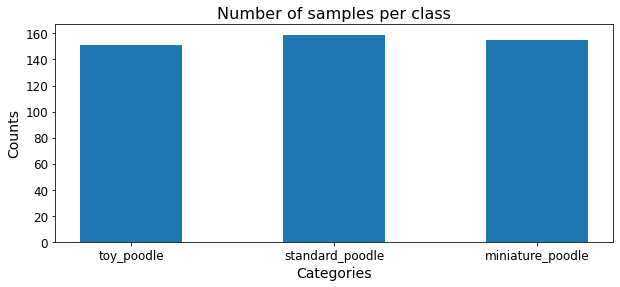

In [ ]:
plot_image_counts(unique_labels, labels_arr)

## 1.2 Split dataset and prepare datasets for modeling

In [ ]:
# split into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(image_names_arr, labels_arr, test_size=0.10, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.12, random_state=42)

load in the images, scale, resize

In [ ]:
train_ds = mymodules.get_dataset(X_train, y_train)
valid_ds = mymodules.get_dataset(X_valid, y_valid)
test_ds = mymodules.get_dataset(X_test, y_test)

In [ ]:
print('training set: {} \nvalidation set: {} \ntest set: {}'.format(len(train_ds), len(valid_ds), len(test_ds)))

training set: 367 
validation set: 51 
test set: 47


shuff, batch, prefetch

In [ ]:
train = train_ds.shuffle(buffer_size=100).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
valid = valid_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test  = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

## 1.3 Display the images in the first batch

In [ ]:
img, lbl = next(train.as_numpy_iterator())
len(img), len(lbl)

(16, 16)

In [ ]:
unique_labels_arr = np.array(unique_labels)

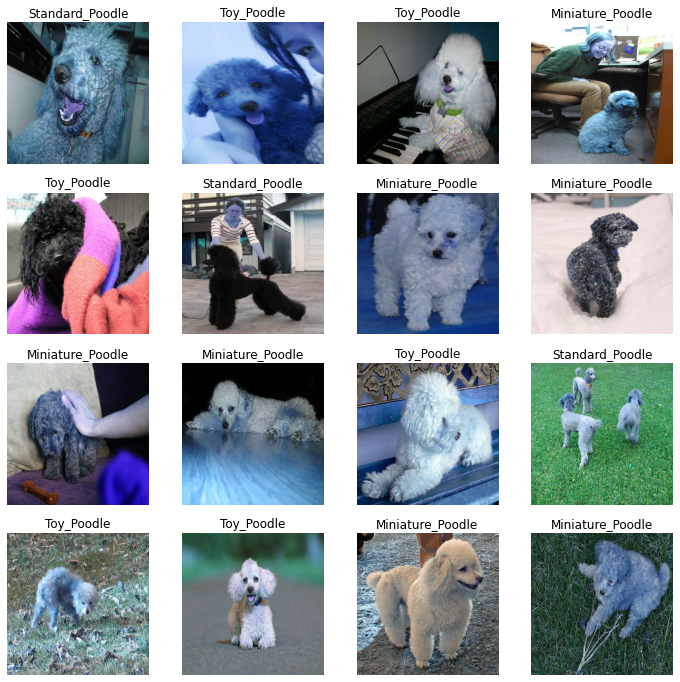

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(12,12))
for i, ax in enumerate(axes.flat):
  ax.imshow(img[i])
  ax.axis('off')
  ax.set_title(unique_labels_arr[lbl[i]].title(), fontsize=12)

## 1.4 Save the tensorflow datasets for training, validation and test sets.

These datasets are used in notebook 02 for modeling

In [ ]:
OUTPUT_PATH = "./drive/MyDrive/dog_breeds_classification/saved_tf_datasets/"
tf.data.experimental.save(train, OUTPUT_PATH + 'train_ds_poodles')
tf.data.experimental.save(valid, OUTPUT_PATH + 'valid_ds_poodles')
tf.data.experimental.save(test, OUTPUT_PATH + 'test_ds_poodles')